In [1]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
import scrapy
from scrapy.crawler import CrawlerProcess

import json

import logging

In [2]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.6.12'

In [3]:


class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('quoteresult_1.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

# Webscrapping


In [4]:


class gratka_spider(scrapy.Spider):
    name = "moj_crawler"
    
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult_1.json'                        # Used for pipeline 2
    } 
    
    def start_requests( self ):
        
            url = 'https://gratka.pl/nieruchomosci/mieszkania/warszawa?page='
            #yield scrapy.Request( url = url, callback = self.parse_front )
           
            for i in range(1, 312):
                yield scrapy.Request(url+str(i),callback=self.parse_front)
        
        
       
    def parse_front( self, response ):
        #course_blocks = response.css( 'div.course-block' )
        #course_links = course_blocks.xpath( './a/@href' )
        links_to_follow = response.css('a.teaserEstate__anchor::attr(href)').extract()
        for url in links_to_follow:
            yield response.follow( url = url,callback = self.parse_pages )
    
#         NEXT_PAGE_SELECTOR ='a.pagination__nextPage::attr(href)' 
#         next_page = response.css(NEXT_PAGE_SELECTOR).extract_first()
#         if next_page:
#             yield scrapy.Request(
#             response.urljoin(next_page),
#             callback=self.parse)      
    
    def parse_pages( self, response ):
          yield {
                'numer_ogloszenia':response.css('span[class=""]::text').extract_first().strip(),
                'tytul': response.css('h1.sticker__title::text').extract_first().strip(),
                'cena': response.css('span.priceInfo__value::text').extract_first().strip(),
                'cena_za_metr': response.css('span.priceInfo__additional::text').extract_first().strip(),
                'lokalizacja':response.css('.parameters__locationLink::text').extract(),
                'atrybuty' : response.xpath('//li/span[not(@*)]/text()')[1:].extract(),  
                'wartosci': response.xpath('//li/b/text()')[3:].extract() 
                #'tags': quote.css('div.tags a.tag::text').extract(),
            }
            
if __name__ == '__main__':
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
    process.crawl(gratka_spider)
    process.start() 



   

2020-11-16 16:53:20 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2020-11-16 16:53:20 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-11-16 16:53:20 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'quoteresult_1.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


2020-11-16 16:54:00 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-sluzewiec-ul-bokserska/ob/17604518> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=11)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc82

2020-11-16 16:54:35 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-wola-ul-obozowa/ob/18417157> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=4)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>",

2020-11-16 17:06:34 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-wlochy-ul-jutrzenki-114/ob/17250963> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=169)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc

2020-11-16 17:13:14 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-al-wilanowska/ob/16811017> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=262)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>",

2020-11-16 17:13:24 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-al-wilanowska/ob/16805813> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=261)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>",

2020-11-16 17:13:26 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-al-wilanowska/ob/16810449> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=261)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>",

2020-11-16 17:16:09 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-bialoleka/ob/17148491> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=293)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", lin

2020-11-16 17:16:30 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-bialoleka/ob/17148341> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=297)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", lin

2020-11-16 17:16:32 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-bialoleka/ob/17147517> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=297)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", lin

2020-11-16 17:16:47 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-bialoleka/ob/17148515> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=295)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", lin

2020-11-16 17:17:43 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ursus/ob/17135577> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=304)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", line 40

2020-11-16 17:17:48 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/mieszkanie-warszawa-srodmiescie-ul-gornoslaska/ob/17712425> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=310)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc82

2020-11-16 17:17:50 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ul-lopuszanska-53/ob/17740979> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=310)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa

2020-11-16 17:17:57 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-sluzewiec-ul-bokserska/ob/17604374> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=309)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc8

2020-11-16 17:18:02 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa/ob/17089909> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=309)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", line 40, in p

2020-11-16 17:18:13 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ursus/ob/17134523> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=304)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", line 40

2020-11-16 17:18:20 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/mieszkanie-warszawa-srodmiescie-ul-gornoslaska/ob/17712423> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=304)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc82

2020-11-16 17:18:27 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa/ob/17380195> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=302)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", line 40, in p

2020-11-16 17:18:30 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ul-lopuszanska-53/ob/17740991> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=302)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa

2020-11-16 17:18:33 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-rembertow-al-gen-antoniego-chrusciela-montera/ob/9288561> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=306)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<

2020-11-16 17:18:40 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa/ob/17090687> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=303)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa4>", line 40, in p

2020-11-16 17:18:48 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-ul-lopuszanska-53/ob/17741687> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=301)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-2d8fc825caa

In [3]:
#trzeba odpalic anaconda prompt, przejsc do folderu C:\Anaconda3\Scripts czyli tam gdzie jesgt scrapy exe i piszesz komende scrapy shell link(bez nawiasow i znaczkow) wtedy mozesz
#uzywac Twich selektorów

In [4]:
# fetch('https://gratka.pl/nieruchomosci/mieszkania/warszawa')
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-2-pokojowe-ulica-bukowinska-12/oi/17764407')

In [5]:
dfjson = pd.read_json('quoteresult_1.json')
dfjson

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18529381,"Mieszkanie Warszawa Praga-Północ, ul. Kępna",507 200,20 000 zł/m,"[Warszawa, Praga-Północ, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 25,36 m, 1, 1, własność, ..."
1,18536317,"Mieszkanie Warszawa Stare Miasto, ul. Długa",760 000,"15 833,33 zł/m","[Warszawa, Stare Miasto, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 48 m, 2, 1, 1962, 4, grat..."
2,18855589,"Mieszkanie Warszawa Praga-Południe, ul. Walewska",580 000,"9 206,35 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 63 m, 3, parter, własność..."
3,1737986,"Mieszkanie Warszawa, ul. Łucka",1 650 000,"10 645,16 zł/m","[Warszawa, mazowieckie]","[Opłaty (czynsz administracyjny, media), Powie...","[1 100 zł, 155 m, 4, 8, spółdzielcze własności..."
4,18916089,Sprzedam apartament w stanie deweloperskim go...,574 000,"8 167,33 zł/m","[Warszawa, Grochów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 70,28 m, 3, 1, własność, ..."
...,...,...,...,...,...,...,...
9406,18196177,"Mieszkanie Warszawa Mokotów, ul. Sielec",600 000,"9 677,42 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 62 m, 3, 3, własność, do ..."
9407,15690198,"Nowe mieszkanie Warszawa Białołęka, ul. Piasta...",615 182,7 180 zł/m,"[Warszawa, Białołęka, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Licz...","[ , 85,68 m, 3, 1, 2, w aneks..."
9408,18195673,"Nowe mieszkanie Warszawa Wola, ul. Prosta",512 068,15 650 zł/m,"[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Mate...","[ , 32,72 m, 1, 2, cegła, 29,..."
9409,18705973,Mieszkanie Warszawa Praga-Południe,435 000,"10 357,14 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan...","[ , 42 m, 2, 3, dobry, blok, ..."


In [6]:
pd.options.display.max_colwidth = 10000

In [7]:
#ponizej jest rozwiazanie problemu zbierania pustych

In [8]:

dfjson[dfjson['numer_ogloszenia']==17459207]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
348,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[ , 141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


In [9]:
dfjson[dfjson['numer_ogloszenia']==17990059]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci


In [10]:
#tutaj totalnye work space
dfjson.wartosci[2]

['                  ',
 '63 m',
 '3',
 'parter',
 'własność',
 'dobry',
 '1951',
 'kamienica',
 'cegła',
 '3',
 'tak',
 'gratka-13640/497/OMS',
 'piwnica']

In [11]:
proba=[]
for el in dfjson.wartosci:
    proba.append([name for name in el if name.strip()])

In [12]:
dfjson.wartosci=proba

In [13]:
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-bemowo-46-m-czerwonych-makow-bezposrednio-meble-i-sprzet-kuchenny-w-cenie/oi/10945461')

In [14]:

new=dfjson[dfjson['numer_ogloszenia']==17459207]

In [15]:
new

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
348,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


# PONIZEJ LINK STACKOVERFLOW

In [16]:
#https://stackoverflow.com/questions/63289454/pandas-convert-list-of-list-to-columns-names-and-append-values/63289635#63289635

In [17]:
df=dfjson.copy()

In [18]:
df.head()

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18529381,"Mieszkanie Warszawa Praga-Północ, ul. Kępna",507 200,20 000 zł/m,"[Warszawa, Praga-Północ, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[25,36 m, 1, 1, własność, 1897, kamienica, 3, w aneksie, tak, gratka-1522/464/OMS]"
1,18536317,"Mieszkanie Warszawa Stare Miasto, ul. Długa",760 000,"15 833,33 zł/m","[Warszawa, Stare Miasto, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[48 m, 2, 1, 1962, 4, gratka-11134/4595/OMS]"
2,18855589,"Mieszkanie Warszawa Praga-Południe, ul. Walewska",580 000,"9 206,35 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[63 m, 3, parter, własność, dobry, 1951, kamienica, cegła, 3, tak, gratka-13640/497/OMS, piwnica]"
3,1737986,"Mieszkanie Warszawa, ul. Łucka",1 650 000,"10 645,16 zł/m","[Warszawa, mazowieckie]","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Stan instalacji, Forma kuchni, Stan łazienki, Okna, Głośność, Czy mieszkanie ma łazienkę?, Forma / wyposażenie łazienki, Usytuowanie względem stron świata, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[1 100 zł, 155 m, 4, 8, spółdzielcze własnościowe z KW, wysoki standard, 2001, apartamentowiec, cegła, 13, w garażu, nowa, w aneksie, bardzo dobry, drewniane, ciche, tak]"
4,18916089,Sprzedam apartament w stanie deweloperskim gotowy do zamieszkania,574 000,"8 167,33 zł/m","[Warszawa, Grochów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?]","[70,28 m, 3, 1, własność, stan deweloperski, apartamentowiec, 6, tak]"


# testowe

In [19]:
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [20]:
test=unnesting(dfjson, ['atrybuty','wartosci'], axis=0)

In [21]:
test.columns

Index(['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24',
       'atrybuty25', 'wartosci0', 'wartosci1', 'wartosci2', 'wartosci3',
       'wartosci4', 'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8',
       'wartosci9', 'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13',
       'wartosci14', 'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18',
       'wartosci19', 'wartosci20', 'wartosci21', 'wartosci22', 'wartosci23',
       'numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja'],
      dtype='object')

In [22]:
#tutaj byloby dobrze to zautomatyzowac

In [23]:
atrybuty_lista=['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24']
wartosci_lista=['wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'wartosci23', 'wartosci24']

In [24]:
test_2=test.fillna('')

In [25]:
test_2.atrybuty0.unique()

array(['Powierzchnia w m2', 'Opłaty (czynsz administracyjny, media)'],
      dtype=object)

# tutaj stworzenie listy z poleczeniami 

In [26]:
w=[]
for i in range(0,21):
    w.append(test_2[('atrybuty')+str(i)]+' '+test_2[('wartosci')+str(i)])

In [27]:
pods=pd.DataFrame(w[0]+' '+w[1]+' '+w[2]+' '+w[3]+' '+w[4]+' '+w[5]+' '+w[6]+' '+w[7]+' '+w[8]+' '+w[9]+' '+w[10]+' '+w[11]+' '+w[12]+' '+w[13]+' '+w[14]+' '+w[15]+' '+w[16]+' '+w[17]+' '+w[18]+' '+w[19]+' '+w[20])#+' '+w[21])#+' '+w[22]+' '+w[23]+' '+w[24])

In [28]:
df['opis']=pods

In [29]:
#pietro
pietro=[]
for words in df['opis']:
    pietro.append(re.findall(r"Piętro+\s\d",  words))

In [30]:
df['pietro'] =pietro
df['pietro'] =df['pietro'].explode()

In [31]:
df['pietro'].replace('Piętro+\s','',regex=True,inplace=True)
df['pietro']

0         1
1         1
2       NaN
3         8
4         1
       ... 
9406      3
9407      1
9408      2
9409      3
9410      7
Name: pietro, Length: 9411, dtype: object

In [32]:
#Powierzchnia w m2
powierzchnia=[]
for words in df['opis']:
    powierzchnia.append(re.findall(r"Powierzchnia\sw\sm2+\s\d+",  words))

In [33]:
df['powierzchnia'] =powierzchnia
df['powierzchnia'] =df['powierzchnia'].explode()

In [34]:
df['powierzchnia'].replace('Powierzchnia\sw\sm2+\s','',regex=True,inplace=True)

In [35]:
#Liczba pokoi
pokoje=[]
for words in df['opis']:
    pokoje.append(re.findall(r"Liczba\spokoi\s\d+",  words))
    
   

In [36]:
df['pokoje'] =pokoje
df['pokoje'] =df['pokoje'].explode()

In [37]:
df['pokoje'].replace('Liczba\spokoi','',regex=True,inplace=True)

In [38]:
#Opłaty (czynsz administracyjny, media),

oplaty=[]
for words in df['opis']:
    oplaty.append(re.findall(r"Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+",  words))
    
    
oplaty_czynsz = []
for sublist in oplaty:
    for item in sublist:
        oplaty_czynsz.append(item)

In [39]:
df['oplaty'] =oplaty
df['oplaty'] =df['oplaty'].explode()

In [40]:
df['oplaty'].replace('Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+','',regex=True,inplace=True)

In [41]:
# TO JEST NIEKONIECZNE< ALE MOZE SIE PRZydAC

#df['oplaty'].fillna('N/A',inplace=True)

In [42]:
#Forma własności DO DOPRACOWANIA, bo tu replace do zrobienia
forma=[]
for words in df['opis']:
    forma.append(re.findall(r"Forma\swłasności+\s\w+",  words))



In [43]:
#Liczba pięter w budynku
pietra_w_bud=[]
for words in df['opis']:
    pietra_w_bud.append(re.findall(r"Liczba\spięter\sw\s\w+\s\d+",  words))
    
 

In [44]:
df['pietra_w_bud'] =pietra_w_bud
df['pietra_w_bud'] =df['pietra_w_bud'].explode()

In [45]:
df['pietra_w_bud'].replace('Liczba\spięter\sw\s\w+\s','',regex=True,inplace=True)

In [46]:
typ_zab=[]


#'Typ zabudowy' 
for words in df['opis']:
    typ_zab.append(re.findall(r"Typ\s\w+\s\w+",  words))   



In [47]:
df['typ_zab'] =typ_zab
df['typ_zab'] =df['typ_zab'].explode()

In [48]:
df['typ_zab'].replace('Typ\s\w+\s','',regex=True,inplace=True)

# Stan - In progress

In [49]:
Stan_test=[]  
for words in df['opis']:
    Stan_test.append(re.findall(r"Stan\s\w+\s\w+",  words))   



In [50]:
Stan_test

[[],
 [],
 ['Stan dobry Rok'],
 ['Stan wysoki standard', 'Stan instalacji nowa', 'Stan łazienki bardzo'],
 ['Stan stan deweloperski'],
 [],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 [],
 ['Stan do odświeżenia'],
 ['Stan do remontu'],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 ['Stan do remontu'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 [],
 ['Stan do odświeżenia'],
 [],
 ['Stan wysoki standard'],
 ['Stan dobry Rok'],
 [],
 ['Stan wysoki standard'],
 ['Stan wysoki standard'],
 ['Stan do remontu'],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan do remontu'],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan dobry Rok'],
 [],
 ['Stan do odświeżenia'],
 [],
 [],
 ['Stan do remontu'],
 [],
 ['Stan wysoki standard'],
 ['Stan wys

In [51]:
#    'Rok budowy' 
rok_budowy=[]
for words in df['opis']:
    rok_budowy.append(re.findall(r"Rok\sbudowy\s\d+",  words))  
    




In [52]:
df['rok_budowy'] =rok_budowy
df['rok_budowy'] =df['rok_budowy'].explode()

In [53]:
df['rok_budowy'].replace('Rok\sbudowy\s','',regex=True,inplace=True)

In [54]:
#              'Materiał budynku' 
material=[]
for words in df['opis']:
    material.append(re.findall(r"Materiał\s\w+\s\w+",  words))




#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

In [55]:
df['material'] =material
df['material'] =df['material'].explode()

In [56]:
df['material'].replace('Materiał\s\w+\s','',regex=True,inplace=True)

In [57]:
df.drop(df[~df['cena_za_metr'].str.contains(r"\d+\s\d+",regex=True)].index,inplace=True)#tutaj usuwam jakies bledne kwoty za mkw

In [58]:
df.head(5)

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material
0,18529381,"Mieszkanie Warszawa Praga-Północ, ul. Kępna",507 200,20 000 zł/m,"[Warszawa, Praga-Północ, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[25,36 m, 1, 1, własność, 1897, kamienica, 3, w aneksie, tak, gratka-1522/464/OMS]","Powierzchnia w m2 25,36 m Liczba pokoi 1 Piętro 1 Forma własności własność Rok budowy 1897 Typ zabudowy kamienica Liczba pięter w budynku 3 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1522/464/OMS",1,25,1,NaN,3,kamienica,1897,NaN
1,18536317,"Mieszkanie Warszawa Stare Miasto, ul. Długa",760 000,"15 833,33 zł/m","[Warszawa, Stare Miasto, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[48 m, 2, 1, 1962, 4, gratka-11134/4595/OMS]",Powierzchnia w m2 48 m Liczba pokoi 2 Piętro 1 Rok budowy 1962 Liczba pięter w budynku 4 Numer referencyjny gratka-11134/4595/OMS,1,48,2,NaN,4,NaN,1962,NaN
2,18855589,"Mieszkanie Warszawa Praga-Południe, ul. Walewska",580 000,"9 206,35 zł/m","[Warszawa, Praga-Południe, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[63 m, 3, parter, własność, dobry, 1951, kamienica, cegła, 3, tak, gratka-13640/497/OMS, piwnica]",Powierzchnia w m2 63 m Liczba pokoi 3 Piętro parter Forma własności własność Stan dobry Rok budowy 1951 Typ zabudowy kamienica Materiał budynku cegła Liczba pięter w budynku 3 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-13640/497/OMS Powierzchnia dodatkowa piwnica,NaN,63,3,NaN,3,kamienica,1951,cegła
3,1737986,"Mieszkanie Warszawa, ul. Łucka",1 650 000,"10 645,16 zł/m","[Warszawa, mazowieckie]","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Stan instalacji, Forma kuchni, Stan łazienki, Okna, Głośność, Czy mieszkanie ma łazienkę?, Forma / wyposażenie łazienki, Usytuowanie względem stron świata, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[1 100 zł, 155 m, 4, 8, spółdzielcze własnościowe z KW, wysoki standard, 2001, apartamentowiec, cegła, 13, w garażu, nowa, w aneksie, bardzo dobry, drewniane, ciche, tak]","Opłaty (czynsz administracyjny, media) 1 100 zł Powierzchnia w m2 155 m Liczba pokoi 4 Piętro 8 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 2001 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 13 Miejsce parkingowe w garażu Stan instalacji nowa Forma kuchni w aneksie Stan łazienki bardzo dobry Okna drewniane Głośność ciche Czy mieszkanie ma łazienkę? tak Forma / wyposażenie łazienki Usytuowanie względem stron świata Komunikacja Zdrowie i uroda",8,155,4,,13,apartamentowiec,2001,cegła
4,18916089,Sprzedam apartament w stanie deweloperskim gotowy do zamieszkania,574 000,"8 167,33 zł/m","[Warszawa, Grochów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?]","[70,28 m, 3, 1, własność, stan deweloperski, apartamentowiec, 6, tak]","Powierzchnia w m2 70,28 m Liczba pokoi 3 Piętro 1 Forma własności własność Stan stan deweloperski Typ zabudowy apartamentowiec Liczba pięter w budynku 6 Czy mieszkanie ma łazienkę? tak",1,70,3,NaN,6,apartamentowiec,NaN,NaN


In [59]:
#cena wraz z funkcja podloga, czyli  grosze ucinamy, bez zaokgraglen

cena_metr=[]

for words in df['cena_za_metr']:
    cena_metr.append(re.findall(r"\d+\s\d+",  words))
    
    
    
cena_metr_kw = []
for sublist in cena_metr:
    for item in sublist:
        cena_metr_kw.append(item)
    

In [60]:
df['cena_metr_kw']=cena_metr_kw

In [61]:
df['cena_metr_kw'].replace(' ',"",inplace=True)

In [62]:
#df['cena_metr_kw'].str.trim()

In [63]:
#złaczenie stringow

In [64]:
cena_metr_kw=[]
for words in df['cena_metr_kw']:
    cena_metr_kw.append(re.sub(r"\s",'',  words))
    
# df['cena_metr_kw']=cena_metr_kw.astype(int)

In [65]:
df['cena_metr_kw']=cena_metr_kw

In [66]:
df['cena_metr_kw']=df['cena_metr_kw'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x1871ef1fe80>,
 'caps': [<matplotlib.lines.Line2D at 0x1871ef29828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1871ef1fcf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1871f5c30f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1871f5c3550>],
 'means': []}

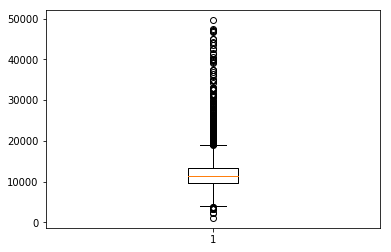

In [67]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [68]:
df=df[(df['cena_metr_kw']<55000) & (df['cena_metr_kw']>4000)].copy()#usuwam skrajne wartosci gdy cena_mkw jest > niz 55000 i mniejsze niz 4000 za mkw

In [69]:
df[df['cena_metr_kw']<4000]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


{'whiskers': [<matplotlib.lines.Line2D at 0x1871f625a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1871f62f358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1871f625908>],
 'medians': [<matplotlib.lines.Line2D at 0x1871f62fba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1871f62ffd0>],
 'means': []}

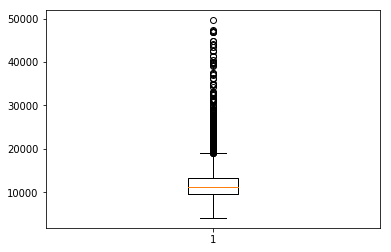

In [70]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [71]:
df.lokalizacja.explode()

0             Warszawa
0         Praga-Północ
0          mazowieckie
1             Warszawa
1         Stare Miasto
             ...      
9409    Praga-Południe
9409       mazowieckie
9410          Warszawa
9410           Imielin
9410       mazowieckie
Name: lokalizacja, Length: 28011, dtype: object

In [72]:
df['cena_metr_kw'].mean()

11916.981688491429

In [73]:
df['cena_metr_kw'].min()

4088

In [74]:
df['cena_metr_kw'].max()

49627

In [75]:
df['cena_metr_kw'].median()

11274.0

In [76]:
test=unnesting(df, ['lokalizacja'], axis=0)

In [77]:
test

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
0,Warszawa,Praga-Północ,mazowieckie,18529381,"Mieszkanie Warszawa Praga-Północ, ul. Kępna",507 200,20 000 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[25,36 m, 1, 1, własność, 1897, kamienica, 3, w aneksie, tak, gratka-1522/464/OMS]","Powierzchnia w m2 25,36 m Liczba pokoi 1 Piętro 1 Forma własności własność Rok budowy 1897 Typ zabudowy kamienica Liczba pięter w budynku 3 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1522/464/OMS",1,25,1,NaN,3,kamienica,1897,NaN,20000
1,Warszawa,Stare Miasto,mazowieckie,18536317,"Mieszkanie Warszawa Stare Miasto, ul. Długa",760 000,"15 833,33 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[48 m, 2, 1, 1962, 4, gratka-11134/4595/OMS]",Powierzchnia w m2 48 m Liczba pokoi 2 Piętro 1 Rok budowy 1962 Liczba pięter w budynku 4 Numer referencyjny gratka-11134/4595/OMS,1,48,2,NaN,4,NaN,1962,NaN,15833
2,Warszawa,Praga-Południe,mazowieckie,18855589,"Mieszkanie Warszawa Praga-Południe, ul. Walewska",580 000,"9 206,35 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[63 m, 3, parter, własność, dobry, 1951, kamienica, cegła, 3, tak, gratka-13640/497/OMS, piwnica]",Powierzchnia w m2 63 m Liczba pokoi 3 Piętro parter Forma własności własność Stan dobry Rok budowy 1951 Typ zabudowy kamienica Materiał budynku cegła Liczba pięter w budynku 3 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-13640/497/OMS Powierzchnia dodatkowa piwnica,NaN,63,3,NaN,3,kamienica,1951,cegła,9206
3,Warszawa,mazowieckie,None,1737986,"Mieszkanie Warszawa, ul. Łucka",1 650 000,"10 645,16 zł/m","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Stan instalacji, Forma kuchni, Stan łazienki, Okna, Głośność, Czy mieszkanie ma łazienkę?, Forma / wyposażenie łazienki, Usytuowanie względem stron świata, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[1 100 zł, 155 m, 4, 8, spółdzielcze własnościowe z KW, wysoki standard, 2001, apartamentowiec, cegła, 13, w garażu, nowa, w aneksie, bardzo dobry, drewniane, ciche, tak]","Opłaty (czynsz administracyjny, media) 1 100 zł Powierzchnia w m2 155 m Liczba pokoi 4 Piętro 8 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 2001 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 13 Miejsce parkingowe w garażu Stan instalacji nowa Forma kuchni w aneksie Stan łazienki bardzo dobry Okna drewniane Głośność ciche Czy mieszkanie ma łazienkę? tak Forma / wyposażenie łazienki Usytuowanie względem stron świata Komunikacja Zdrowie i uroda",8,155,4,,13,apartamentowiec,2001,cegła,10645
4,Warszawa,Grochów,mazowieckie,18916089,Sprzedam apartament w stanie deweloperskim gotowy do zamieszkania,574 000,"8 167,33 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?]","[70,28 m, 3, 1, własność, stan deweloperski, apartamentowiec, 6, tak]","Powierzchnia w m2 70,28 m Liczba pokoi 3 Piętro 1 Forma własności własność Stan stan deweloperski Typ zabudowy apartamentowiec Liczba pięter w budynku 6 Czy mieszkanie ma łazienkę? tak",1,70,3,NaN,6,apartamentowiec,NaN,NaN,8167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9406,Warszawa,Mokotów,mazowieckie,18196177,"Mieszkanie Warszawa Mokotów, ul. Sielec",600 000,"9 677,42 zł/m","

In [78]:
test.groupby('lokalizacja1').count()

,lokalizacja0,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
lokalizacja1,,,,,,,,,,,,,,,,,,
Anin,7,7,7,7,7,7,7,7,7,4,7,7,1,7,3,6,2,7
Bemowo,466,466,466,466,466,466,466,466,466,368,466,466,70,458,421,371,190,466
Białołęka,548,548,548,548,548,548,548,548,548,421,548,548,59,539,465,416,185,548
Białołęka Dworska,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1
Bielany,328,328,328,328,328,328,328,328,328,285,328,328,61,319,294,289,163,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mazowieckie,168,0,168,168,168,168,168,168,168,134,168,167,19,154,145,98,65,168
ŚRÓDMIEŚCIE,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1
Śródmieście,882,882,882,882,882,882,882,882,882,766,882,880,157,826,725,788,469,882


In [79]:
test.lokalizacja1.unique()

array(['Praga-Północ', 'Stare Miasto', 'Praga-Południe', 'mazowieckie',
       'Grochów', 'Śródmieście', 'Nowe Miasto', 'Mokotów', 'Sielce',
       'Bielany', 'Ursynów', 'Wola', 'Odolany', 'Włochy', 'Służew',
       'Tarchomin', 'Białołęka', 'Bemowo', 'Ochota', 'Żoliborz',
       'Szczęśliwice', 'Stara Miłosna', 'Powiśle', 'Czerniaków',
       'Służewiec', 'Nowodwory', 'Wilanów', 'Ursus', 'Zawady', 'Skorosze',
       'Powsin', 'Targówek', 'Słodowiec', 'Bródno', 'Żerań', 'Rakowiec',
       'Wyczółki', 'Chomiczówka', 'Mirów', 'Stegny', 'Saska Kępa',
       'Młynów', 'Ksawerów', 'Gocław', 'Czyste', 'Wawer', 'Okęcie',
       'Marysin Wawerski', 'Zacisze', 'Natolin', 'Gocławek',
       'Olszynka Grochowska', 'Wesoła', 'Muranów', 'Rembertów',
       'Dolny Mokotów', 'Kabaty', 'Górny Mokotów', 'Jelonki',
       'Międzylesie', 'Sadyba', 'Młociny', 'Ulrychów', 'Chrzanów',
       'Wawrzyszew', 'Kobiałka', 'Kamionek', 'Grabów', 'Piaski', 'Górce',
       'ŚRÓDMIEŚCIE', 'Koło', 'Siekierki', 'Królik

In [80]:
test.lokalizacja0.unique()

array(['Warszawa'], dtype=object)

In [81]:
test.lokalizacja2.unique()

array(['mazowieckie', None], dtype=object)

In [82]:
df.pokoje.value_counts()

 2    3387
 3    3363
 4    1337
 1     867
 5     317
 6      75
 7      19
 8       1
Name: pokoje, dtype: int64

In [83]:
cena_calosc=[]
for words in df['cena']:
    cena_calosc.append(re.sub(r"\s",'',  words))

In [84]:
#robie przykładowo jak to zmienic

In [85]:
df.cena=cena_calosc

In [86]:
df.cena.replace('\D\d+','',regex=True,inplace=True)

In [87]:
df.cena=df.cena.astype(int)

In [88]:
#cena_za_metr     zmienic na float, stadardowo jest na int, bo zrobilem funkcje podlogi, ale to do przemyslenia.
#                    NA TEN MOMENT ZOSTAJE i korzystam ze zmiennej cena_metr_kw      
#powierzchnia      zmienic na float
#pokoje            RACZEJ zostawic - zmienie bo nie moge robic relacji pomiedzy nimi
#oplaty             zmienic na float
#

In [89]:
df.pokoje.replace(np.NaN,0,inplace=True)

In [90]:
df[df['pokoje'].isnull()]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


In [91]:
df.pokoje=df.pokoje.astype(int)

In [92]:
#powierzchnia

df.powierzchnia=df.powierzchnia.astype(int)

In [93]:
df[df.pokoje>5]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
12,18518859,"Mieszkanie Warszawa Ursynów, ul. Nowoursynowska",1200000,7 500 zł/m,"[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[160 m, 6, 4, własność, do odświeżenia, 1995, blok, 4, tak, gratka-11100/4595/OMS, piwnica]",Powierzchnia w m2 160 m Liczba pokoi 6 Piętro 4 Forma własności własność Stan do odświeżenia Rok budowy 1995 Typ zabudowy blok Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-11100/4595/OMS Powierzchnia dodatkowa piwnica,4,160,6,NaN,4,blok,1995,NaN,7500
58,13308539,"Mieszkanie Warszawa Bemowo, ul. Widawska",1160000,"9 871,50 zł/m","[Warszawa, Bemowo, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[117,51 m, 6, 3, spółdzielcze własnościowe, do remontu, 1998, blok, cegła, 4, w garażu, oddzielna, gratka-15824/3685/OMS]","Powierzchnia w m2 117,51 m Liczba pokoi 6 Piętro 3 Forma własności spółdzielcze własnościowe Stan do remontu Rok budowy 1998 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 4 Miejsce parkingowe w garażu Forma kuchni oddzielna Numer referencyjny gratka-15824/3685/OMS",3,117,6,NaN,4,blok,1998,cegła,9871
73,18481503,"Nowe mieszkanie Warszawa Mokotów, ul. Huculska",2789000,"15 324,18 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[182 m, 6, 5, własność, 2018, apartamentowiec, 6, 1, tak, gratka-18853/2089/OMS, balkon]",Powierzchnia w m2 182 m Liczba pokoi 6 Piętro 5 Forma własności własność Rok budowy 2018 Typ zabudowy apartamentowiec Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-18853/2089/OMS Powierzchnia dodatkowa balkon,5,182,6,NaN,6,apartamentowiec,2018,NaN,15324
114,18875421,Mieszkanie Warszawa Śródmieście,2599000,"10 383,54 zł/m","[Warszawa, Śródmieście, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[250,30 m, 6, 13, spółdzielcze własnościowe z KW, do remontu, 1998, apartamentowiec, 13, 1, tak, gratka-74/10573/OMS]","Powierzchnia w m2 250,30 m Liczba pokoi 6 Piętro 13 Forma własności spółdzielcze własnościowe z KW Stan do remontu Rok budowy 1998 Typ zabudowy apartamentowiec Liczba pięter w budynku 13 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-74/10573/OMS",1,250,6,NaN,13,apartamentowiec,1998,NaN,10383
214,18792909,"Mieszkanie Warszawa Żoliborz, ul. Barszczewska",2900000,"14 694,70 zł/m","[Warszawa, Żoliborz, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[197,35 m, 6, 12, własność, wysoki standard, 2010, apartamentowiec, rama H, 13, 1, tak, gratka-76/6523/OMS, balkon]","Powierzchnia w m2 197,35 m Liczba pokoi 6 Piętro 12 Forma własności własność Stan wysoki standard Rok budowy 2010 Typ zabudowy apartamentowiec Materiał budynku rama H Liczba pięter w budynku 13 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-76/6523/OMS Powierzchnia dodatkowa balkon",1,197,6,NaN,13,apartamentowiec,2010,rama,14694
...,...,...,...,...,...,...,...,...,...,.

In [94]:
test[test.lokalizacja1=='mazowieckie']#to mozemy wywalic gdy zachodzi taki warunek, bo tak naprawde to dla celow statytycznych tylko

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
3,Warszawa,mazowieckie,None,1737986,"Mieszkanie Warszawa, ul. Łucka",1 650 000,"10 645,16 zł/m","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Stan instalacji, Forma kuchni, Stan łazienki, Okna, Głośność, Czy mieszkanie ma łazienkę?, Forma / wyposażenie łazienki, Usytuowanie względem stron świata, Komunikacja, Zdrowie i uroda, Edukacja, Pozostałe]","[1 100 zł, 155 m, 4, 8, spółdzielcze własnościowe z KW, wysoki standard, 2001, apartamentowiec, cegła, 13, w garażu, nowa, w aneksie, bardzo dobry, drewniane, ciche, tak]","Opłaty (czynsz administracyjny, media) 1 100 zł Powierzchnia w m2 155 m Liczba pokoi 4 Piętro 8 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 2001 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 13 Miejsce parkingowe w garażu Stan instalacji nowa Forma kuchni w aneksie Stan łazienki bardzo dobry Okna drewniane Głośność ciche Czy mieszkanie ma łazienkę? tak Forma / wyposażenie łazienki Usytuowanie względem stron świata Komunikacja Zdrowie i uroda",8,155,4,,13,apartamentowiec,2001,cegła,10645
18,Warszawa,mazowieckie,None,18851381,"Nowe mieszkanie Warszawa, ul. Goleszowska",437 000,"11 891,16 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Dostępność od, Numer referencyjny]","[36,75 m, 2, 1, 2020, blok, beton, 8, 1, w aneksie, 2020-11-01, gratka-3831/9376/OMS]","Powierzchnia w m2 36,75 m Liczba pokoi 2 Piętro 1 Rok budowy 2020 Typ zabudowy blok Materiał budynku beton Liczba pięter w budynku 8 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Dostępność od 2020-11-01 Numer referencyjny gratka-3831/9376/OMS",1,36,2,NaN,8,blok,2020,beton,11891
207,Warszawa,mazowieckie,None,18754901,"Nowe mieszkanie Warszawa, ul. Skarbka z Gór",460 000,"8 156,03 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[56,40 m, 2, 3, własność, wysoki standard, 2019, blok, cegła, 3, 1, tak, gratka-224/5836/OMS, balkon]","Powierzchnia w m2 56,40 m Liczba pokoi 2 Piętro 3 Forma własności własność Stan wysoki standard Rok budowy 2019 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-224/5836/OMS Powierzchnia dodatkowa balkon",3,56,2,NaN,3,blok,2019,cegła,8156
209,Warszawa,mazowieckie,None,18754655,"Nowe mieszkanie Warszawa, ul. Skarbka z Gór",460 000,"8 363,64 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[55 m, 3, 3, wysoki standard, 2019, blok, cegła, 3, 1, tak, gratka-223/5836/OMS, balkon]",Powierzchnia w m2 55 m Liczba pokoi 3 Piętro 3 Stan wysoki standard Rok budowy 2019 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-223/5836/OMS Powierzchnia dodatkowa balkon,3,55,3,NaN,3,blok,2019,cegła,8363
342,Warszawa,mazowieckie,None,18863965,Mieszkanie Warszawa,1 540 000,"15 098,04 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny, Powierzchnia dodatkowa]","[102 m, 3, 1, własność, 1937, kamienica, 3, 1, tak, gratka-1591/464/OMS]",Po

In [95]:
df['dzielnica']=test.iloc[:,1]

# WIZUALIZACJA

(array([5.393e+03, 3.096e+03, 6.500e+02, 1.870e+02, 3.700e+01, 1.700e+01,
        5.000e+00, 6.000e+00, 0.000e+00, 2.000e+00]),
 array([ 12. ,  60.8, 109.6, 158.4, 207.2, 256. , 304.8, 353.6, 402.4,
        451.2, 500. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'powierzchnia')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram powierzchnia')

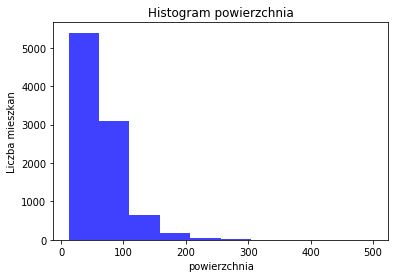

In [96]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['powierzchnia'],facecolor='b', alpha=0.75)



plt.xlabel('powierzchnia')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram powierzchnia')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([1236., 5667., 1966.,  365.,   72.,   40.,   17.,   14.,   10.,
           6.]),
 array([ 4088. ,  8641.9, 13195.8, 17749.7, 22303.6, 26857.5, 31411.4,
        35965.3, 40519.2, 45073.1, 49627. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena/mkw')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena/mkw')

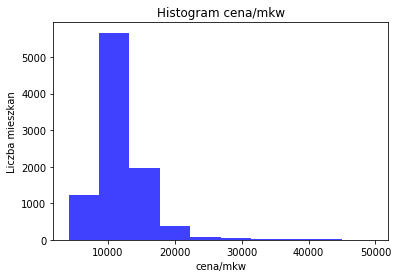

In [97]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena_metr_kw'],facecolor='b', alpha=0.75)



plt.xlabel('cena/mkw')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena/mkw')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([8.70e+03, 5.48e+02, 8.30e+01, 2.90e+01, 1.70e+01, 4.00e+00,
        8.00e+00, 1.00e+00, 0.00e+00, 3.00e+00]),
 array([  150000.,  1541240.,  2932480.,  4323720.,  5714960.,  7106200.,
         8497440.,  9888680., 11279920., 12671160., 14062400.]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena')

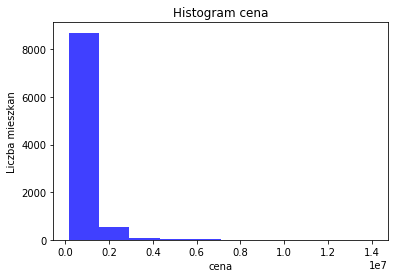

In [98]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena'],facecolor='b', alpha=0.75)



plt.xlabel('cena')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([2.700e+01, 8.670e+02, 3.387e+03, 3.363e+03, 0.000e+00, 1.337e+03,
        3.170e+02, 7.500e+01, 1.900e+01, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'pokoje')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram pokoje')

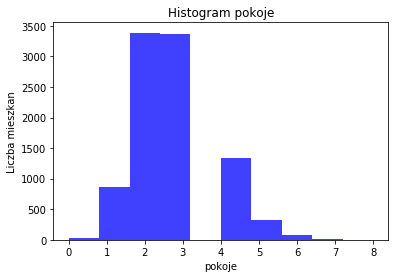

In [99]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['pokoje'],facecolor='b', alpha=0.75)



plt.xlabel('pokoje')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram pokoje')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

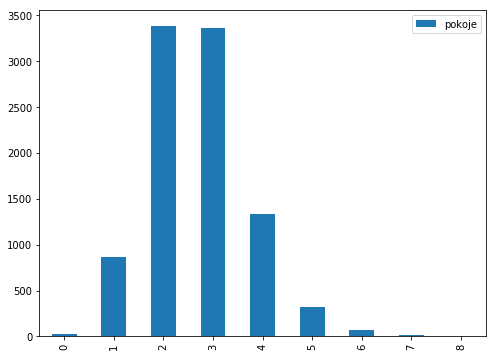

In [100]:
#wykres do tego fajnie by zrobic
df['pokoje'].value_counts().sort_index().plot.bar(figsize=(8, 6),legend=True)


In [101]:
import seaborn as sns


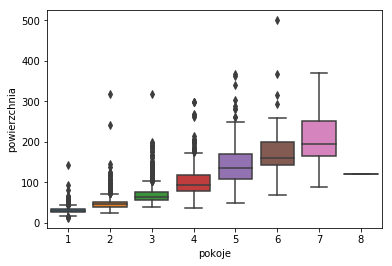

In [102]:
sns.boxplot(x="pokoje", y="powierzchnia", data=df[df.pokoje>0])

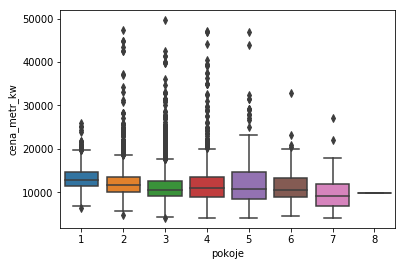

In [103]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [104]:
#widac, ze wraz ze wzrostem liczby pokoi średnia cena za mkw spada

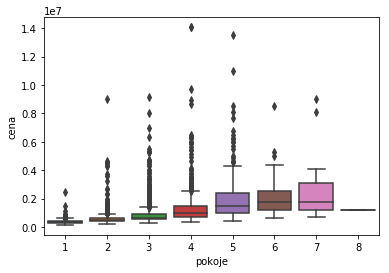

In [105]:
sns.boxplot(x="pokoje", y="cena", data=df[df.pokoje>0])

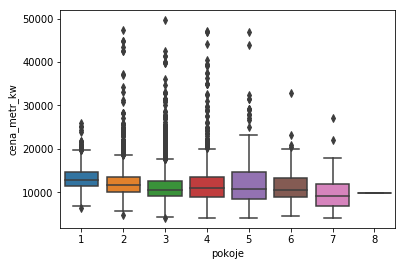

In [106]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

### cena przy wiekszej liczbie pokoi rosnie, ale cena za metr kwadratowy przy wiekszej liczbie pokoi juz niekoniecznie

In [107]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Stare Miasto,1135000.0,19278.0
1,Śródmieście,890000.0,15270.0
2,Nowe Miasto,804500.0,15238.0
3,Powiśle,1150000.0,15159.0
4,Powązki,497000.0,15108.0
...,...,...,...
93,Radość,850000.0,6787.0
94,Lewandów,365000.0,6709.0
95,Brzeziny,587500.0,6584.0
96,Las,564500.0,6066.0


In [108]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False),2)

,cena,cena_metr_kw
dzielnica,,
Stare Miasto,1648464.48,21103.13
Powiśle,1662426.27,17019.18
Śródmieście,1363408.29,16914.01
Nowe Miasto,926000.00,15363.71
Powązki,497000.00,15108.00
...,...,...
Brzeziny,585750.00,7103.12
Radość,864250.00,6799.38
Lewandów,365000.00,6709.00


In [109]:
df.groupby('dzielnica')[['cena','cena_metr_kw']].median()

,cena,cena_metr_kw
dzielnica,,
Anin,690000.0,8333.0
Bemowo,571230.0,9849.0
Białołęka,450000.0,8186.0
Białołęka Dworska,375000.0,7812.0
Bielany,530000.0,10555.0
...,...,...
mazowieckie,549900.0,11507.0
ŚRÓDMIEŚCIE,570000.0,11875.0
Śródmieście,890000.0,15270.0


In [110]:
pd.options.display.max_rows = 999

In [111]:
df.dzielnica.value_counts()

Mokotów                1092
Śródmieście             882
Wola                    876
Białołęka               548
Praga-Południe          543
Ursynów                 475
Bemowo                  466
Wilanów                 377
Ochota                  374
Bielany                 328
Targówek                269
Ursus                   269
Żoliborz                266
Praga-Północ            255
Włochy                  187
mazowieckie             168
Wawer                   130
Powiśle                 110
Gocław                  100
Tarchomin                91
Grochów                  88
Saska Kępa               84
Sadyba                   75
Bródno                   74
Służewiec                70
Stegny                   68
Kabaty                   61
Szczęśliwice             49
Sielce                   49
Rembertów                45
Górny Mokotów            43
Odolany                  43
Służew                   41
Gocławek                 39
Natolin                  35
Zawady              

In [112]:
# mazowieckie damy, że to jest "INNE"

In [113]:
#Prawilna lista dzielnic https://pl.wikipedia.org/wiki/Podzia%C5%82_administracyjny_Warszawy
 
#     Bemowo
#     Białołęka
#     Bielany
#     Mokotów
#     Ochota
#     Praga Południe
#     Praga Północ
#     Rembertów
#     Śródmieście
#     Targówek
#     Ursus
#     Ursynów
#     Wawer
#     Wesoła
#     Wilanów
#     Włochy
#     Wola
#     Żoliborz


In [114]:
df.dzielnica.replace('WILANÓW','Wilanów',inplace=True)

### Przypisanie dzielnic 

In [115]:
# Źródłow https://pl.wikipedia.org/wiki/Mokot%C3%B3w i drugie jeszcze dodatam xD
df.dzielnica.replace(['Stary Mokotów','Sielce','Czerniaków','Siekierki','Augustówka','Sadyba','Stegny','Wierzbno','Ksawerów','Służew','Służewiec','Wyględów','Górny Mokotów','Dolny Mokotów','Królikarnia'],'Mokotów',inplace=True)

In [116]:
#https://pl.wikipedia.org/wiki/%C5%9Ar%C3%B3dmie%C5%9Bcie_(Warszawa)

In [117]:
df.dzielnica.replace(['Powiśle','Stare Miasto','Muranów','Centrum','Nowe Miasto','Mariensztat','Latawiec','ŚRÓDMIEŚCIE'],'Śródmieście',inplace=True)

In [118]:
#https://pl.wikipedia.org/wiki/Miejski_System_Informacji_(Warszawa)

In [119]:
df.dzielnica.replace(['Grochów','Gocław','Gocławek','Olszynka Grochowska','Saska Kępa','Kamionek'],'Praga-Południe',inplace=True)

In [120]:
df.dzielnica.replace(['Elsnerów','Bródno','Zacisze','Utrata'],'Targówek',inplace=True)

In [121]:
df.dzielnica.replace(['Młociny','Marymont','Słodowiec','Wawrzyszew','Wrzeciono','Chomiczówka','Piaski'],'Bielany',inplace=True)

In [122]:
df.dzielnica.replace(['Choszczówka','Grodzisk','Nowodwory','Tarchomin','Żerań','Białołęka Dworska','Lewandów','Dąbrówka Szlachecka','Augustów','Kępa Tarchomińska','Henryków','Kobiałka','Brzeziny'],'Białołęka',inplace=True)

In [123]:
df.dzielnica.replace(['Chrzanów','Górce','Jelonki','Groty','Fort Bema','Nowe Górce','Karolin'],'Bemowo',inplace=True)

In [124]:
df.dzielnica.replace(['Czyste','Koło','Młynów','Mirów','Nowolipki','Odolany','Powązki','Ulrychów'],'Wola',inplace=True)

In [125]:
df.dzielnica.replace(['Filtry','Rakowiec','Szczęśliwice','Stara Ochota'],'Ochota',inplace=True)

In [126]:
df.dzielnica.replace(['Nowe Włochy','Okęcie','Paluch','Raków'],'Włochy',inplace=True)

In [127]:
df.dzielnica.replace(['Kabaty','Grabów','Natolin','Imielin','Wyczółki','Pyry'],'Ursynów',inplace=True)

In [128]:
df.dzielnica.replace(['Czechowice','Gołąbki','Niedźwiadek','Skorosze','Szamoty'],'Ursus',inplace=True)

In [129]:
df.dzielnica.replace(['Powsinek','Zawady','Kępa Zawadowska','Powsin'],'Wilanów',inplace=True)

In [130]:
df.dzielnica.replace(['Aleksandrów','Anin','Falenica','Las','Miedzeszyn','Międzylesie','Marysin Wawerski','Radość','Zerzeń','Zbytki','Borków','Sadul'],'Wawer',inplace=True)

In [131]:
df.dzielnica.replace(['Szmulki','Szmulowizna','Praga','Pelcowizna'],'Praga-Północ',inplace=True)

In [132]:
df.dzielnica.replace(['Nowy Rembertów','Stary Rembertów','Kawęczyn-Wygoda'],'Rembertów',inplace=True)

In [133]:
df.dzielnica.replace(['Stara Miłosna','Wola Grzybowska'],'Wesoła',inplace=True)

In [134]:
df.dzielnica.replace(['Cytadela'],'Żoliborz',inplace=True)

In [135]:
df.dzielnica.replace(['mazowieckie'],'brak informacji',inplace=True)

In [136]:
# df.dzielnica.value_counts()

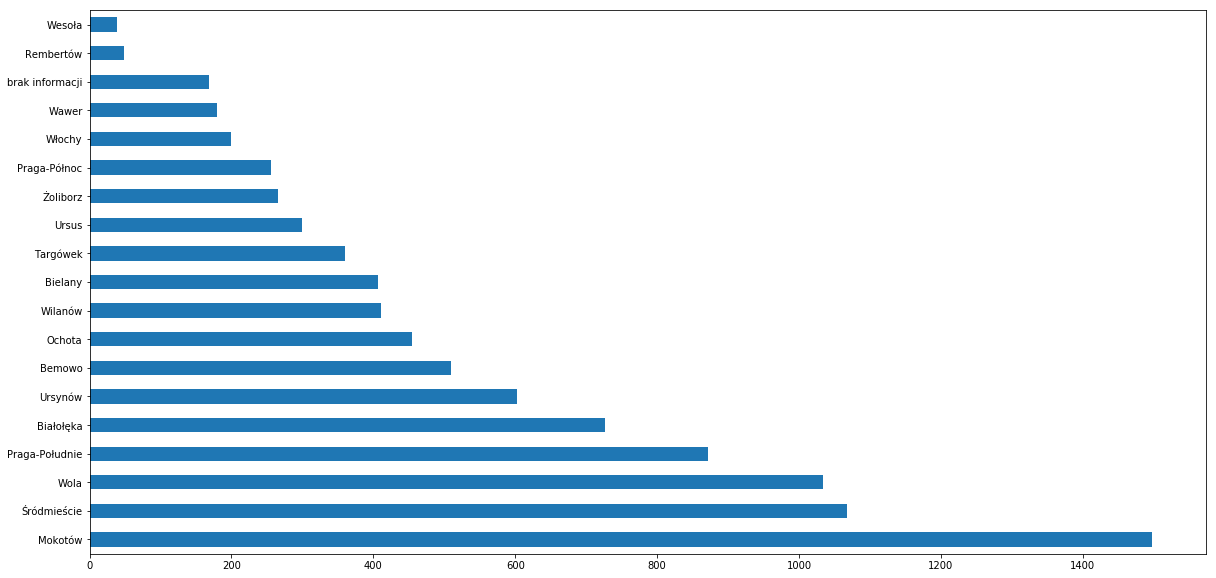

In [137]:
df['dzielnica'].value_counts().plot(kind='barh',figsize=(20,10))

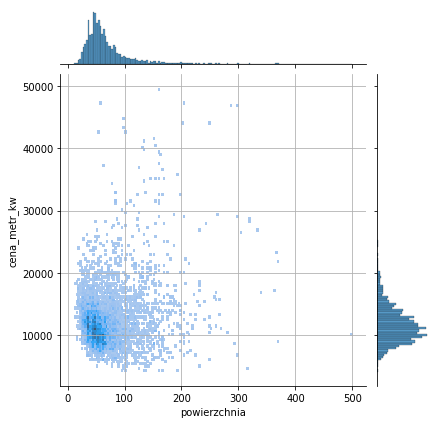

In [138]:
#To sie liczy kilkanasie minut i nic z tego nie ma
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],kind="hist")


 


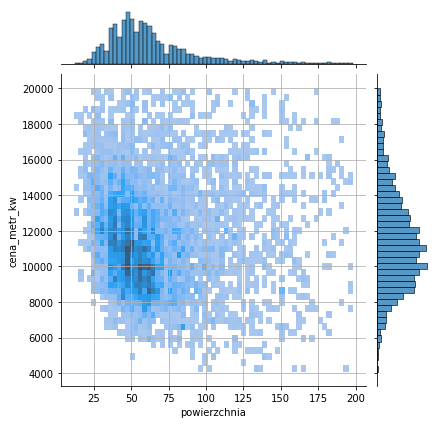

In [139]:
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[(df.pokoje>0)&(df.cena_metr_kw<20000)&(df.powierzchnia<200)],kind="hist")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


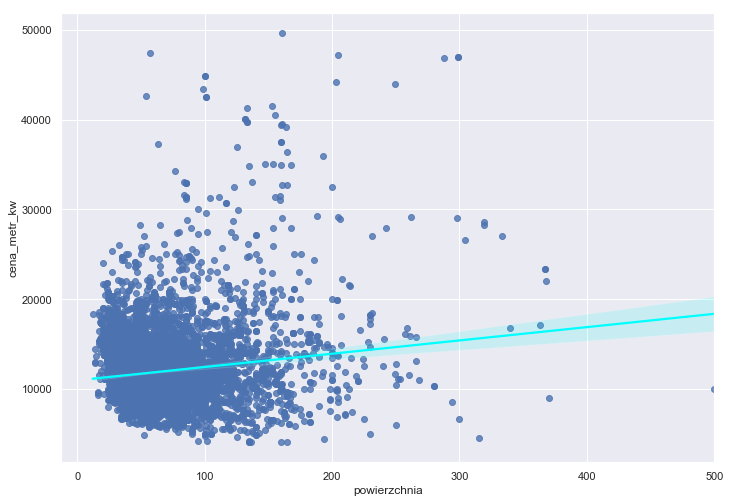

In [140]:
import pandas.util.testing as tm

# use the function regplot to make a scatterplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],line_kws=({'color':'cyan'}))
#sns.plt.show()

In [141]:
df.cena_metr_kw.mean()

11916.981688491429

<Figure size 1440x864 with 0 Axes>

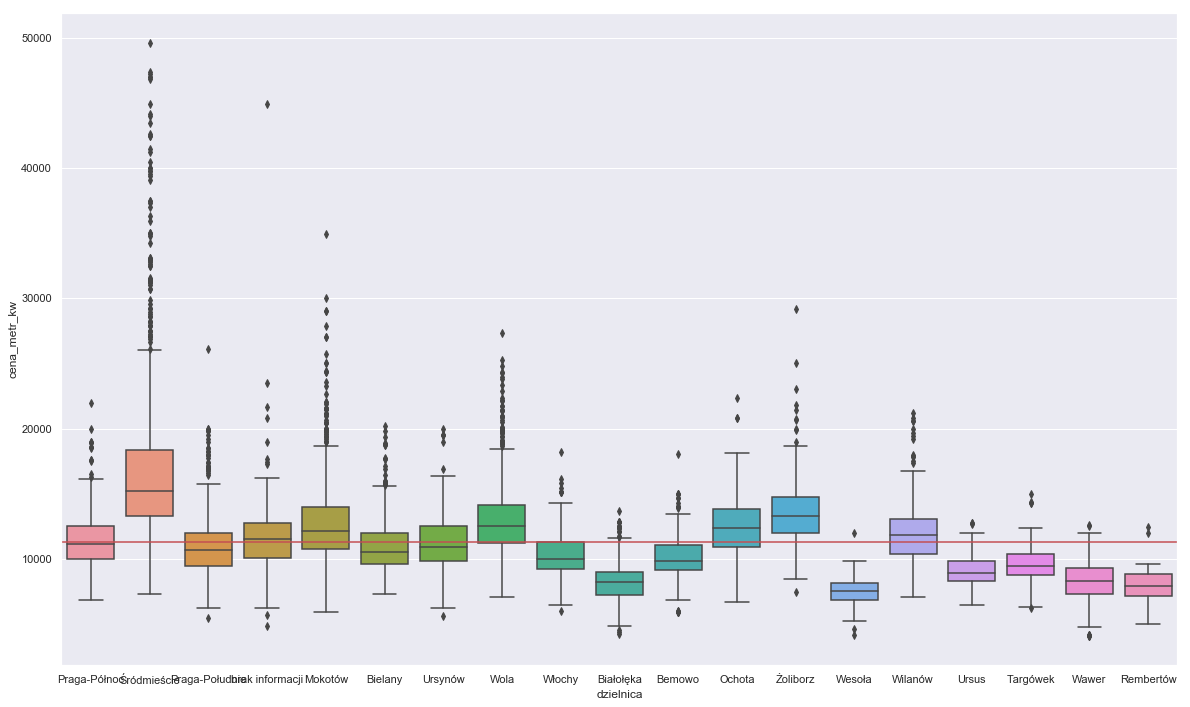

In [142]:
plt.figure(figsize=(20,12))
sns.boxplot(x="dzielnica", y="cena_metr_kw", data=df[df.pokoje>0])
plt.axhline(y=df.cena_metr_kw.median(),color='r')#srednia dla całego miasta

In [143]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,898000.0,15191.0
1,Żoliborz,782500.0,13299.5
2,Wola,617000.0,12549.0
3,Ochota,648950.0,12333.0
4,Mokotów,698449.0,12103.5
5,Wilanów,850000.0,11805.0
6,brak informacji,549900.0,11507.0
7,Praga-Północ,572500.0,11168.0
8,Ursynów,675000.0,10921.0
9,Praga-Południe,557500.0,10701.0


In [144]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,1382504.56,16945.23
1,Żoliborz,988456.65,13647.32
2,Wola,721753.67,13054.06
3,Mokotów,949099.55,12667.33
4,Ochota,783893.79,12418.30
5,Wilanów,1061218.73,11947.60
6,brak informacji,666349.23,11804.57
7,Praga-Północ,671172.95,11659.83
8,Ursynów,764025.28,11123.92
9,Bielany,627341.46,11121.58


In [145]:
df[df.dzielnica=='Mokotów']

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica
7,18816513,"Mieszkanie Warszawa Mokotów, ul. Naruszewicza",2490000,"22 019,81 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Dostępność od, Numer referencyjny, Powierzchnia dodatkowa]","[113,08 m, 4, 1, 2015, 6, 2020-06-02, gratka-305276, taras]","Powierzchnia w m2 113,08 m Liczba pokoi 4 Piętro 1 Rok budowy 2015 Liczba pięter w budynku 6 Dostępność od 2020-06-02 Numer referencyjny gratka-305276 Powierzchnia dodatkowa taras",1,113,4,NaN,6,NaN,2015,NaN,22019,Mokotów
8,18480425,"Mieszkanie Warszawa Sielce, ul. Czerska",960000,"11 497,01 zł/m","[Warszawa, Sielce, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki, Powierzchnia dodatkowa]","[83,50 m, 3, 5, własność, 2005, apartamentowiec, cegła, 10, w aneksie, tak, gratka-KNG-MS-2543, osobne WC, balkon]","Powierzchnia w m2 83,50 m Liczba pokoi 3 Piętro 5 Forma własności własność Rok budowy 2005 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 10 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-KNG-MS-2543 Forma / wyposażenie łazienki osobne WC Powierzchnia dodatkowa balkon",5,83,3,NaN,10,apartamentowiec,2005,cegła,11497,Mokotów
10,18817519,"Nowe mieszkanie Warszawa Mokotów, ul. Ksawerów",8654760,29 000 zł/m,"[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Liczba pięter w budynku, Numer referencyjny, Powierzchnia dodatkowa]","[298,44 m, 4, 1, 3, gratka-118648, taras]","Powierzchnia w m2 298,44 m Liczba pokoi 4 Piętro 1 Liczba pięter w budynku 3 Numer referencyjny gratka-118648 Powierzchnia dodatkowa taras",1,298,4,NaN,3,NaN,NaN,NaN,29000,Mokotów
19,18909443,"Mieszkanie Warszawa Służew, ul. Sonaty",699000,"11 365,85 zł/m","[Warszawa, Służew, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny, Powierzchnia dodatkowa]","[61,50 m, 3, 3, spółdzielcze własnościowe, dobry, 1977, rama H, 3, gratka-30519/2133/OMS, balkon]","Powierzchnia w m2 61,50 m Liczba pokoi 3 Piętro 3 Forma własności spółdzielcze własnościowe Stan dobry Rok budowy 1977 Materiał budynku rama H Liczba pięter w budynku 3 Numer referencyjny gratka-30519/2133/OMS Powierzchnia dodatkowa balkon",3,61,3,NaN,3,NaN,1977,rama,11365,Mokotów
22,18401069,"Mieszkanie Warszawa Mokotów, ul. Lange",456000,"10 987,95 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny, Powierzchnia dodatkowa]","[41,50 m, 2, 9, 1975, 10, gratka-MN346798859166]","Powierzchnia w m2 41,50 m Liczba pokoi 2 Piętro 9 Rok budowy 1975 Liczba pięter w budynku 10 Numer referencyjny gratka-MN346798859166 Powierzchnia dodatkowa",9,41,2,NaN,10,NaN,1975,NaN,10987,Mokotów
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9387,18705757,"Mieszkanie Warszawa Mokotów, ul. Wałbrzyska",655000,"11 909,09 zł/m","[Warszawa, Mokotów, mazowieckie]","[Opłaty (czynsz administracyjny, media), Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Stan instalacji, Forma kuchni, Stan łazienki, Okna, Głośność, Numer referencyjny]","[607 zł, 55 m, 3, 2, spółdzielcze własnościowe z KW, do remontu, 1977, blok, rama H, 3, brak miejsca parkingowego, po wymianie, oddzielna, do remontu, plastikowe/PCV, ciche, gratka-483441]","Opłaty (czynsz administracyjny, media) 607 zł Powierzchnia w m2 55 m Liczba pokoi 3 Piętro 2 Forma własności spółdzielcze własnościowe z KW Stan do re

<Figure size 1440x864 with 0 Axes>

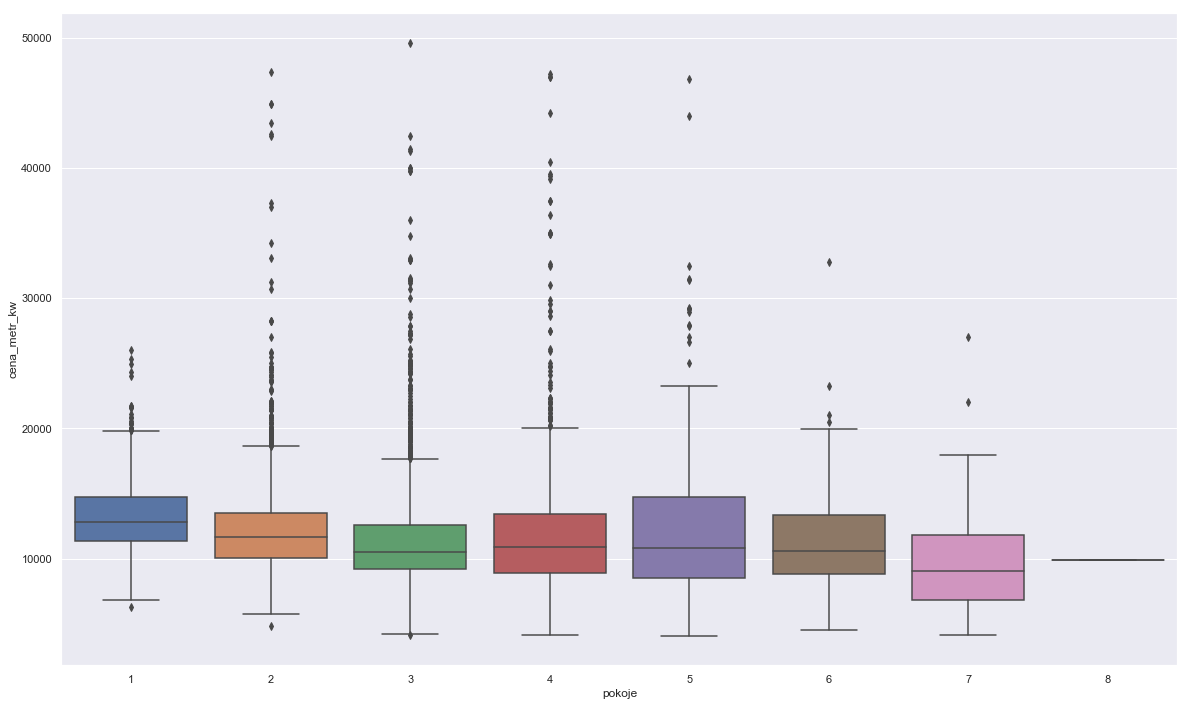

In [146]:
plt.figure(figsize=(20,12))
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [147]:
round(df[df.pokoje>0].groupby("pokoje").agg({'cena_metr_kw':['median','mean']}))

cena_metr_kw         
             median     mean
pokoje                      
1             12790  13177.0
2             11671  12116.0
3             10545  11382.0
4             10891  11857.0
5             10800  12391.0
6             10576  11510.0
7              9024  10968.0
8              9900   9900.0

In [148]:
# df.groupby([(pd.cut(df['powierzchnia'], bins=bins),'dzielnica').powierzchnia.count()

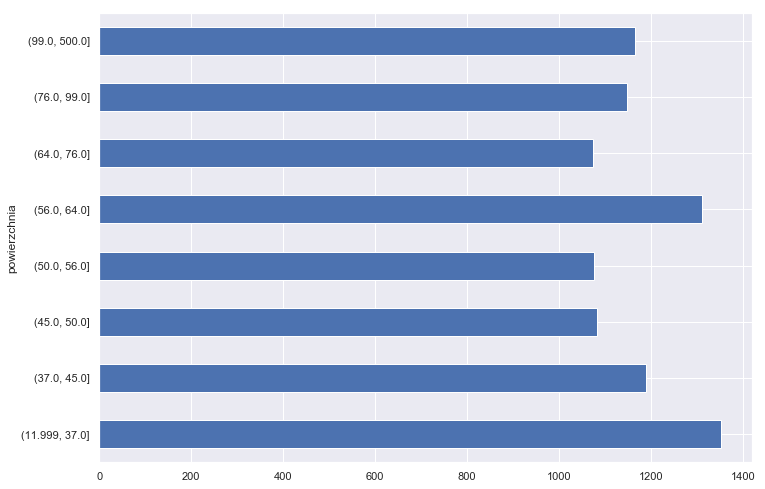

In [149]:
#bins = [0, 35, 45,55, 65,75,90,120, 1000]
df_to_plot = df.groupby(pd.qcut(df['powierzchnia'], q=8)).powierzchnia.count()
df_to_plot.plot(kind='barh')

In [150]:
df['powierzchnia_bins']=pd.qcut(df['powierzchnia'], q=8)

In [151]:
df.columns

Index(['numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja',
       'atrybuty', 'wartosci', 'opis', 'pietro', 'powierzchnia', 'pokoje',
       'oplaty', 'pietra_w_bud', 'typ_zab', 'rok_budowy', 'material',
       'cena_metr_kw', 'dzielnica', 'powierzchnia_bins'],
      dtype='object')

In [152]:
def count_below_mean(dataframe_series):
    sum(i > np.mean(dataframe_series) for i in dataframe_series)
    return dataframe_series

In [153]:
round(df.groupby(['dzielnica','powierzchnia_bins']).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean','count']}),2)

cena_metr_kw                 cena  \
                                        median      mean     median   
dzielnica       powierzchnia_bins                                     
Bemowo          (11.999, 37.0]         12205.0  12094.21   390000.0   
                (37.0, 45.0]           11986.5  11446.88   472500.0   
                (45.0, 50.0]           10440.0  10485.27   500000.0   
                (50.0, 56.0]            9862.0  10004.83   549066.0   
                (56.0, 64.0]            9511.5   9642.29   575140.0   
                (64.0, 76.0]            9538.0   9792.31   680000.0   
                (76.0, 99.0]            9702.0   9784.20   809000.0   
                (99.0, 500.0]           8966.5   8652.57   986238.0   
Białołęka       (11.999, 37.0]          9050.0   9286.32   299750.0   
                (37.0, 45.0]            8823.0   8747.82   370000.0   
                (45.0, 50.0]            8912.5   8599.56   429950.0   
                (50.0, 56.0]            8353.0   8199.93   444950.0   
                (56.0, 64.0]            7901.5   7995.79   468071.0   
                (64.0, 76.0]            8333.0   8333.15   578100.0   
                (76.0, 99.0]            6948.5   7094.68   600955.0   
                (99.0, 500.0]           6485.0   6471.92   792500.0   
Bielany         (11.999, 37.0]         11387.0  12191.14   395000.0   
                (37.0, 45.0]           10921.0  11484.45   439000.0   
                (45.0, 50.0]           10319.0  10914.12   500000.0   
                (50.0, 56.0]           10000.0  10326.18   539885.0   
                (56.0, 64.0]            9561.0  10227.62   565000.0   
                (64.0, 76.0]           10506.0  11180.05   760000.0   
                (76.0, 99.0]            9812.0  10372.17   864900.0   
                (99.0, 500.0]          14015.0  12700.14  1690000.0   
Mokotów         (11.999, 37.0]         12777.0  13335.32   415000.0   
                (37.0, 45.0]           12032.0  12510.22   508950.0   
                (45.0, 50.0]           11680.0  12073.61   565700.0   
                (50.0, 56.0]           11469.0  11735.72   619000.0   
                (56.0, 64.0]           11034.0  11435.35   665000.0   
                (64.0, 76.0]           12318.0  12504.25   850000.0   
                (76.0, 99.0]           12907.5  13246.41  1099000.0   
                (99.0, 500.0]          13850.0  13883.76  1710000.0   
Ochota          (11.999, 37.0]         12745.5  13111.98   410000.0   
                (37.0, 45.0]           12221.5  12384.78   499000.0   
                (45.0, 50.0]           10832.0  11789.98   513780.0   
                (50.0, 56.0]           12539.0  12280.88   650000.0   
                (56.0, 64.0]           11650.0  11984.40   699000.0   
                (64.0, 76.0]           12876.0  12311.04   940000.0   
                (76.0, 99.0]           12266.5  12251.31  1044222.5   
                (99.0, 500.0]          11841.0  12449.39  1476500.0   
Praga-Południe  (11.999, 37.0]         11998.0  12169.79   365500.0   
                (37.0, 45.0]           11352.0  11304.87   457000.0   
                (45.0, 50.0]           11041.5  11110.49   534191.5   
                (50.0, 56.0]           10500.0  10788.79   555000.0   
                (56.0, 64.0]            9912.5  10164.90   599950.0   
                (64.0, 76.0]            9840.0  10160.02   688500.0   
                (76.0, 99.0]           10224.0  10584.35   875000.0   
                (99.0, 500.0]          10516.0  10619.02  1159730.0   
Praga-Północ    (11.999, 37.0]         12194.5  12763.59   342500.0   
                (37.0, 45.0]           11395.0  12301.61   488000.0   
                (45.0, 50.0]           11155.0  11262.24   550000.0   
                (50.0, 56.0]           10377.0  10490.03   550000.0   
                (56.0, 64.0]           10566.0  10899.48   634000.0   
                (64.0, 76.0]           11000.0  11116.19  

In [154]:
#generalnie wszystko ponizej srednie powinno juz byc dobrą inwestycją

In [155]:
df[(df['powierzchnia_bins'].astype(str) == str(pd.Interval(left=56.0, right=63.0))) & (df['dzielnica']=='Wola')& (df['cena_metr_kw']<10482)]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica,powierzchnia_bins


In [156]:
df.groupby(['dzielnica','pokoje']).agg({'cena_metr_kw':['median','mean','min', 'max']})

cena_metr_kw                            
                             median          mean    min    max
dzielnica       pokoje                                         
Bemowo          1           12205.0  11329.434783   8149  14263
                2           10897.5  10784.686747   8245  14000
                3            9536.0   9739.566524   6826  15000
                4            9480.0   9261.757143   5899  15000
                5            7117.0   9184.923077   7000  18019
                6            8933.0   8832.000000   7692   9871
                7            6000.0   6000.000000   6000   6000
Białołęka       1            9375.0   9525.901961   6265  12800
                2            8491.0   8487.759857   5746  13709
                3            7927.5   7982.746528   4200  12500
                4            7890.0   7502.010870   4857  12499
                5            6761.5   6776.000000   5272   8152
                6            5522.0   5437.666667   4507   6284
                7            4381.0   4381.000000   4381   4381
Bielany         0           11914.0  11914.000000  11914  11914
                1           12499.5  13331.294118  10208  19322
                2           10767.0  11195.732877   8176  18888
                3           10049.0  10817.303371   7698  20169
                4           10466.5  10757.638889   7842  15217
                5            8993.0   9350.272727   7305  11526
Mokotów         0           11426.0  11680.800000   9985  13833
                1           12868.0  13435.800000  10250  20442
                2           12464.0  12795.989518   7575  24453
                3           11350.0  12104.992970   5933  30000
                4           12450.0  13201.781377   7500  34964
                5           12941.0  12874.652778   7142  27000
                6           14673.0  14597.769231   9056  20496
                7           13687.5  15099.750000   6024  27000
                8            9900.0   9900.000000   9900   9900
Ochota          0           10279.0  10897.000000   9000  12990
                1           13048.0  13522.672414   9570  20833
                2           12221.5  12487.760417   6710  20833
                3           11602.0  11786.966942   8004  17549
                4           13241.0  12839.016393   8426  22323
                5           11841.0  11635.400000   8478  18010
                7            8761.5   8761.500000   8499   9024
Praga-Południe  0           14758.0  13981.000000   7872  16718
                1           11841.0  12179.490196   8022  17741
                2           11228.0  11332.619808   7890  19000
                3           10156.0  10523.339869   6967  26097
                4           10450.0  10410.150943   6363  19792
                5            9189.0   9736.655172   6253  17440
                6            9285.0   9078.272727   5492  13011
Praga-Północ    1           12925.0  13304.046512   6800  20000
                2           11000.0  11512.504950   8422  21963
                3           10566.0  10954.047619   7409  17614
                4           10872.0  11553.375000   8843  18974
                5           10858.5  10954.875000   7092  13500
                6           10200.0  10200.000000  10200  10200
Rembertów       1            8802.0   8993.250000   8800   9569
                2            8715.0   8729.928571   6800  12410
                3            7935.0   7880.066667   5533  11955
                4            7693.0   7062.923077   5021   8272
                5            7833.0   7833.000000   7486   8180
Targówek        1           10348.5  10483.375000   8688  12400
                2            9870.0  10094.875862   7574  14983
                3            8951.0   9069.150327   6241  12000
                4            9550.0   9627.862069   7000  14367
                5            7790.0   7862.200000   6902   9090
                6            8797.0   8665.666667   769

In [157]:
round(df.groupby(['dzielnica',]).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean'],'powierzchnia':['median','mean']}),2)

cena_metr_kw                cena             powierzchnia  \
                      median      mean    median        mean       median   
dzielnica                                                                   
Bemowo                9817.0  10059.68  575280.0   628339.78         60.0   
Białołęka             8233.5   8188.88  456450.0   473517.15         54.0   
Bielany              10520.0  11121.58  536500.0   627341.46         50.0   
Mokotów              12103.5  12667.33  698449.0   949099.55         59.0   
Ochota               12333.0  12418.30  648950.0   783893.79         52.0   
Praga-Południe       10701.0  10969.23  557500.0   638208.83         54.0   
Praga-Północ         11168.0  11659.83  572500.0   671172.95         52.5   
Rembertów             7927.5   7997.44  509499.5   504940.69         62.5   
Targówek              9470.5   9599.78  479000.0   520489.22         52.0   
Ursus                 8928.0   9120.79  470000.0   508494.10         52.0   
Ursynów              10921.0  11123.92  675000.0   764025.28         63.0   
Wawer                 8291.0   8200.71  556780.0   586454.71         68.0   
Wesoła                7563.0   7566.67  560000.0   549683.90         67.0   
Wilanów              11805.0  11947.60  850000.0  1061218.73         75.0   
Wola                 12549.0  13054.06  617000.0   721753.67         49.0   
Włochy               10000.0  10375.96  546000.0   620490.84         57.0   
brak informacji      11507.0  11804.57  549900.0   666349.23         48.5   
Śródmieście          15191.0  16945.23  898000.0  1382504.56         60.0   
Żoliborz             13299.5  13647.32  782500.0   988456.65         59.0   

                        
                  mean  
dzielnica               
Bemowo           63.68  
Białołęka        59.54  
Bielany          56.24  
Mokotów          72.72  
Ochota           63.30  
Praga-Południe   59.33  
Praga-Północ     58.42  
Rembertów        65.42  
Targówek         54.90  
Ursus            56.65  
Ursynów          70.76  
Wawer            76.28  
Wesoła           76.21  
Wilanów          87.21  
Wola             55.73  
Włochy           60.39  
brak informacji  56.95  
Śródmieście      74.76  
Żoliborz         69.75

In [158]:
import os
def remove_jl(name):
    if os.path.exists(name):
        os.remove(name)
    else:
        print("brak pliku o takiej nazwie")  

In [159]:



# remove_jl("quoteresult.jl")
# remove_jl("quoteresult.json")